# Computer Vision Masterclass - Homework

In [1]:
import dlib
import cv2
from google.colab.patches import cv2_imshow
import zipfile
import os
import numpy as np
from sklearn.metrics import accuracy_score
from PIL import Image

In [2]:
path = 'jones_gabriel.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [4]:
def get_image_data():
  paths = [os.path.join('jones_gabriel', f) for f in os.listdir('jones_gabriel')]
  faces = []
  ids = []

  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(os.path.split(path)[1].split('.')[1])
    ids.append(id)
    faces.append(image_np)
  
  return np.array(ids), faces

In [5]:
ids, faces = get_image_data()
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14, grid_x=9, grid_y=9)
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [6]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('lbph_classifier.yml')

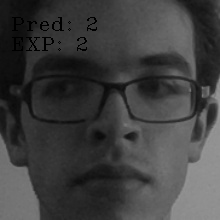

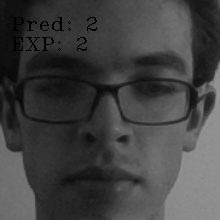

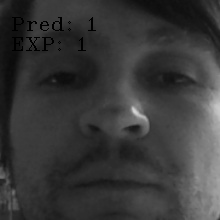

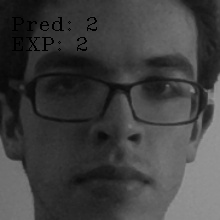

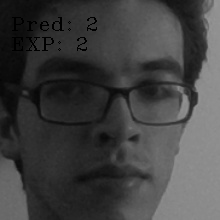

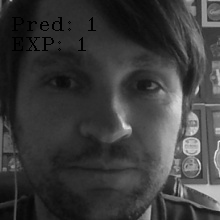

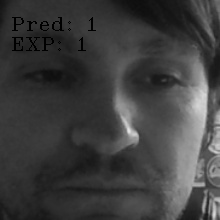

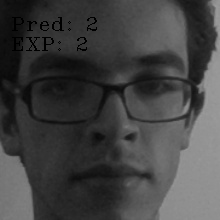

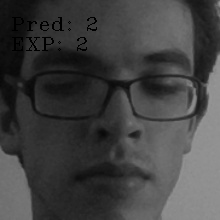

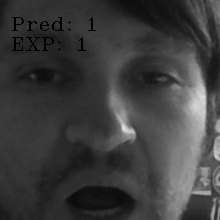

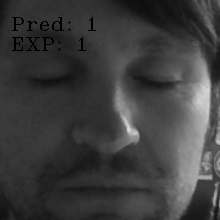

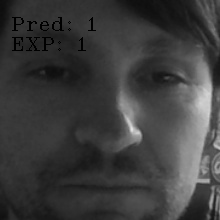

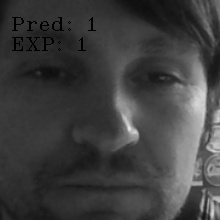

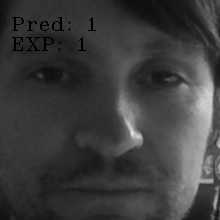

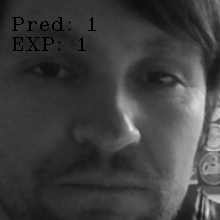

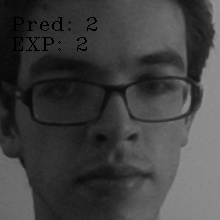

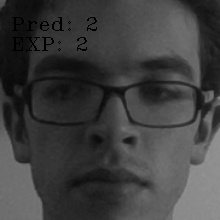

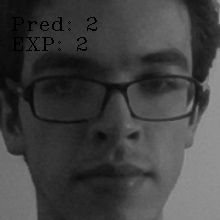

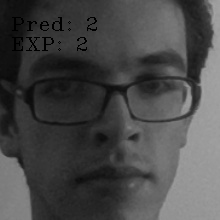

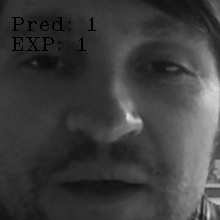

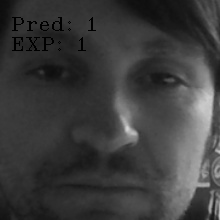

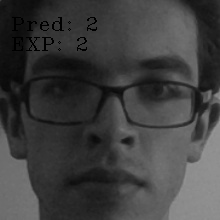

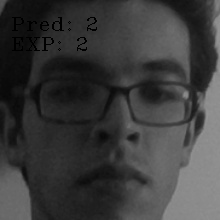

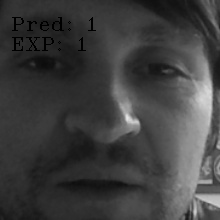

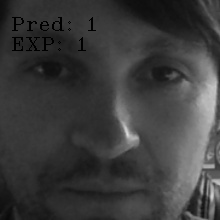

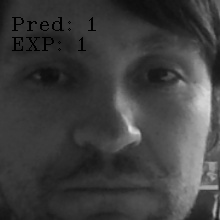

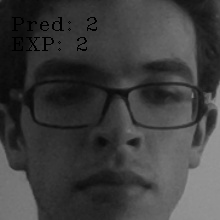

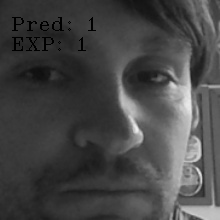

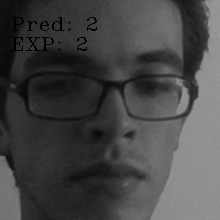

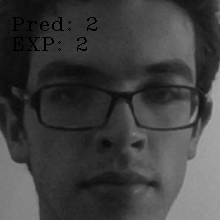

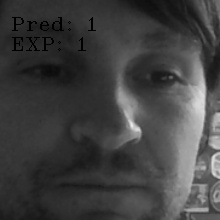

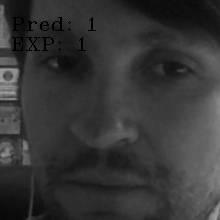

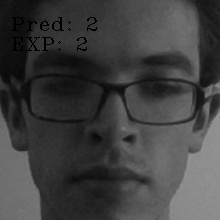

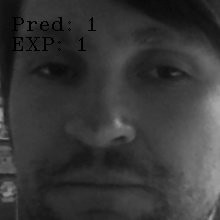

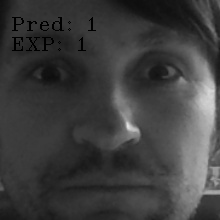

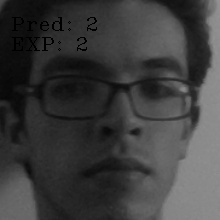

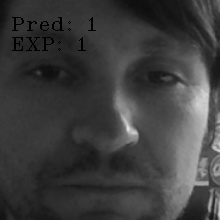

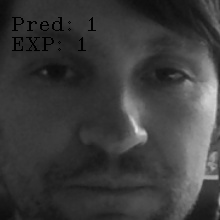

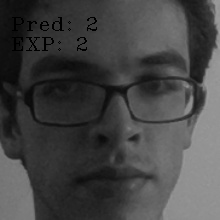

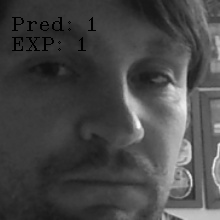

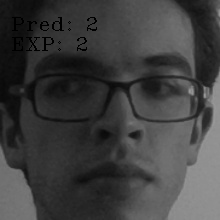

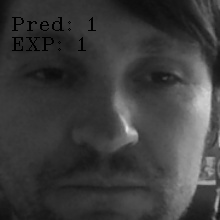

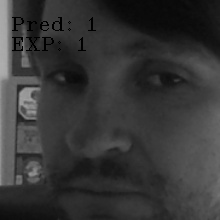

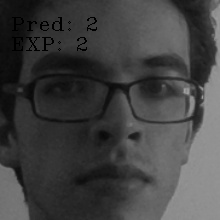

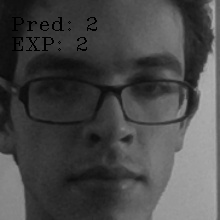

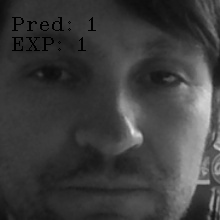

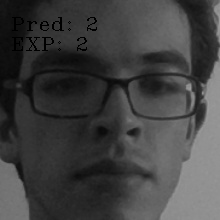

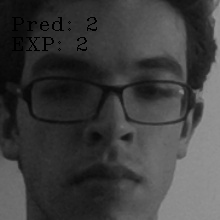

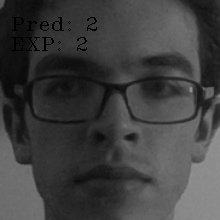

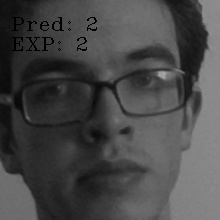

In [7]:
paths = [os.path.join('jones_gabriel', f) for f in os.listdir('jones_gabriel')]
predictions = []
expected_outputs = []
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(os.path.split(path)[1].split('.')[1])
  cv2.putText(image_np, 'Pred: ' + str(prediction), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0))
  cv2.putText(image_np, 'EXP: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0))
  cv2_imshow(image_np)
  predictions.append(prediction)
  expected_outputs.append(expected_output)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [8]:
accuracy_score(expected_outputs, predictions)

1.0